In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset_df = pd.read_csv(r"./postmonsoon/ground_water_quality_2018_post.csv")

dataset = dataset_df.values

In [4]:
for index, row in dataset_df.iterrows():
    if 'NA' in row.values:
        dataset_df.drop(index, inplace=True)
dataset_df.reset_index(drop=True, inplace=True)

In [5]:
null_threshold = len(dataset_df) * 0.25 # 25% of the number of rows
for column in dataset_df.columns:
    null_count = dataset_df[column].isnull().sum()
    if null_count > null_threshold:
        dataset_df.drop(column, axis=1, inplace=True)
    elif null_count > 0:
        dataset_df.dropna(subset=[column], inplace=True)
dataset_df.reset_index(drop=True, inplace=True)

In [6]:
dataset_df.head()

,sno,district,mandal,village,lat_gis,long_gis,gwl,season,pH,E.C,...,SO4,Na,K,Ca,Mg,T.H,SAR,Classification,RSC meq / L,Classification.1
0,1,ADILABAD,Adilabad,Adilabad,19.668300,78.524700,5.09,postmonsoon 2018,8.28,745,...,46.0,49.0,4.0,48,38.896,279.934211,1.273328,C2S1,-1.198684,P.S.
1,2,ADILABAD,Bazarhatnur,Bazarhatnur,19.458888,78.350833,5.10,postmonsoon 2018,8.29,921,...,68.0,42.0,5.0,56,63.206,399.893092,0.913166,C3S1,-3.397862,P.S.
2,3,ADILABAD,Gudihatnoor,Gudihatnoor,19.525555,78.512222,4.98,postmonsoon 2018,7.69,510,...,44.0,45.0,2.0,24,38.896,219.934211,1.319284,C2S1,-0.398684,P.S.
3,4,ADILABAD,Jainath,Jainath,19.730555,78.640000,5.75,postmonsoon 2018,8.09,422,...,35.0,27.0,1.0,32,19.448,159.967105,0.928155,C2S1,0.000658,P.S.
4,5,ADILABAD,Narnoor,Narnoor,19.495665,78.852654,2.15,postmonsoon 2018,8.21,2321,...,280.0,298.0,5.0,56,92.378,519.843750,5.682664,C4S2,-4.396875,P.S.


In [7]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sno               371 non-null    int64  
 1   district          371 non-null    object 
 2   mandal            371 non-null    object 
 3   village           371 non-null    object 
 4   lat_gis           371 non-null    float64
 5   long_gis          371 non-null    float64
 6   gwl               371 non-null    float64
 7   season            371 non-null    object 
 8   pH                371 non-null    float64
 9   E.C               371 non-null    int64  
 10  TDS               371 non-null    float64
 11  CO3               371 non-null    int64  
 12  HCO3              371 non-null    float64
 13  Cl                371 non-null    int64  
 14  F                 371 non-null    float64
 15  NO3               371 non-null    float64
 16  SO4               371 non-null    float64
 1

In [8]:
dataset_df.describe()

,sno,lat_gis,long_gis,gwl,pH,E.C,TDS,CO3,HCO3,Cl,F,NO3,SO4,Na,K,Ca,Mg,T.H,SAR,RSC meq / L
count,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000
mean,188.873315,17.704159,78.795515,12.074340,7.894124,1314.428571,841.234286,6.954178,278.294556,187.843666,1.238898,73.827226,44.252022,123.110569,7.883558,73.423181,50.691725,391.776670,2.913552,-2.130509
std,109.277690,0.855598,0.818212,8.533991,0.451942,762.411265,487.943210,18.340490,125.683132,176.283517,0.826748,86.192205,54.664998,103.771990,21.056080,54.971653,36.042589,237.526685,3.114842,4.421964
min,1.000000,15.896441,77.444000,0.570000,6.600000,212.000000,135.680000,0.000000,30.000000,10.000000,0.070000,0.442900,1.000000,5.076154,0.160000,8.000000,4.862000,39.991776,0.201487,-30.870545
25%,94.500000,17.122656,78.186912,5.115000,7.580000,777.500000,497.600000,0.000000,186.854763,60.000000,0.694500,20.665311,15.000000,58.653526,1.960000,40.000000,24.310000,239.938322,1.497093,-3.814145
50%,189.000000,17.644700,78.591328,10.000000,7.920000,1174.000000,751.360000,0.000000,264.811308,140.000000,1.060000,46.303182,24.000000,97.654862,3.000000,56.000000,43.758000,339.934211,2.137948,-1.222538
75%,283.500000,18.357601,79.349625,16.575000,8.215000,1667.500000,1067.200000,0.000000,354.254846,260.000000,1.540000,100.930870,43.875000,154.437728,6.000000,96.000000,63.206000,499.921875,3.345181,0.023702
max,379.000000,19.730555,80.920000,43.170000,10.440000,5440.000000,3481.600000,100.000000,970.588963,1500.000000,4.970000,735.214000,453.000000,714.800195,213.700000,488.000000,228.514000,2099.638158,31.079547,17.412602


In [9]:
dataset_df.isnull().sum()

sno                 0
district            0
mandal              0
village             0
lat_gis             0
long_gis            0
gwl                 0
season              0
pH                  0
E.C                 0
TDS                 0
CO3                 0
HCO3                0
Cl                  0
F                   0
NO3                 0
SO4                 0
Na                  0
K                   0
Ca                  0
Mg                  0
T.H                 0
SAR                 0
Classification      0
RSC  meq  / L       0
Classification.1    0
dtype: int64

<Axes: >

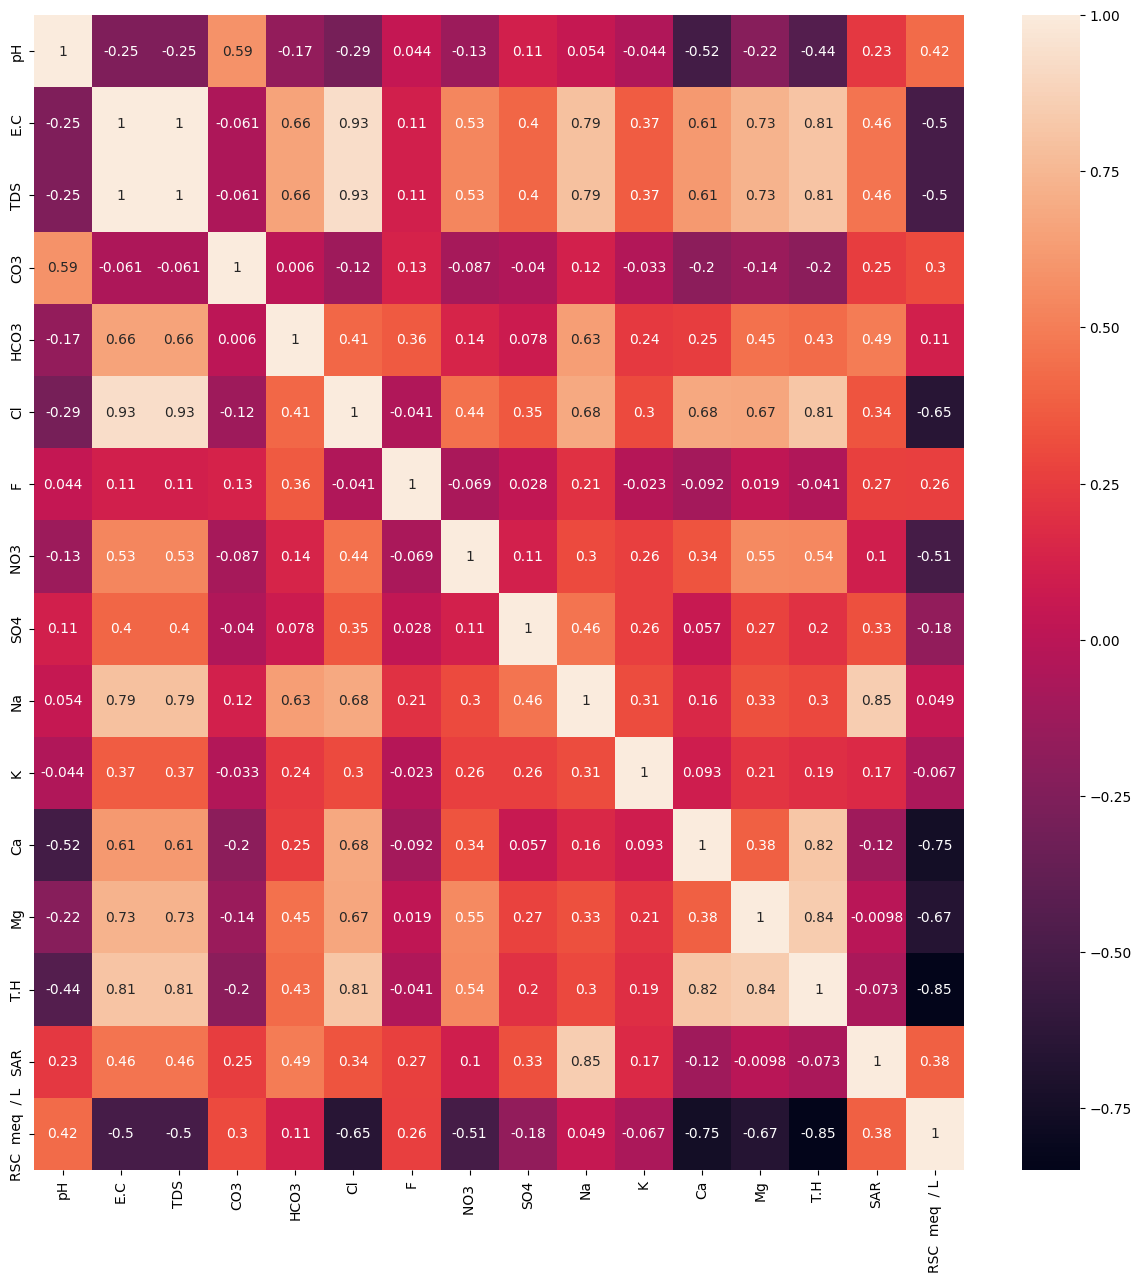

In [10]:
new_dataset_df = dataset_df.drop(['lat_gis','long_gis','gwl','sno','district','mandal','village','season','Classification','Classification.1'], axis=1)
correlation = new_dataset_df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)

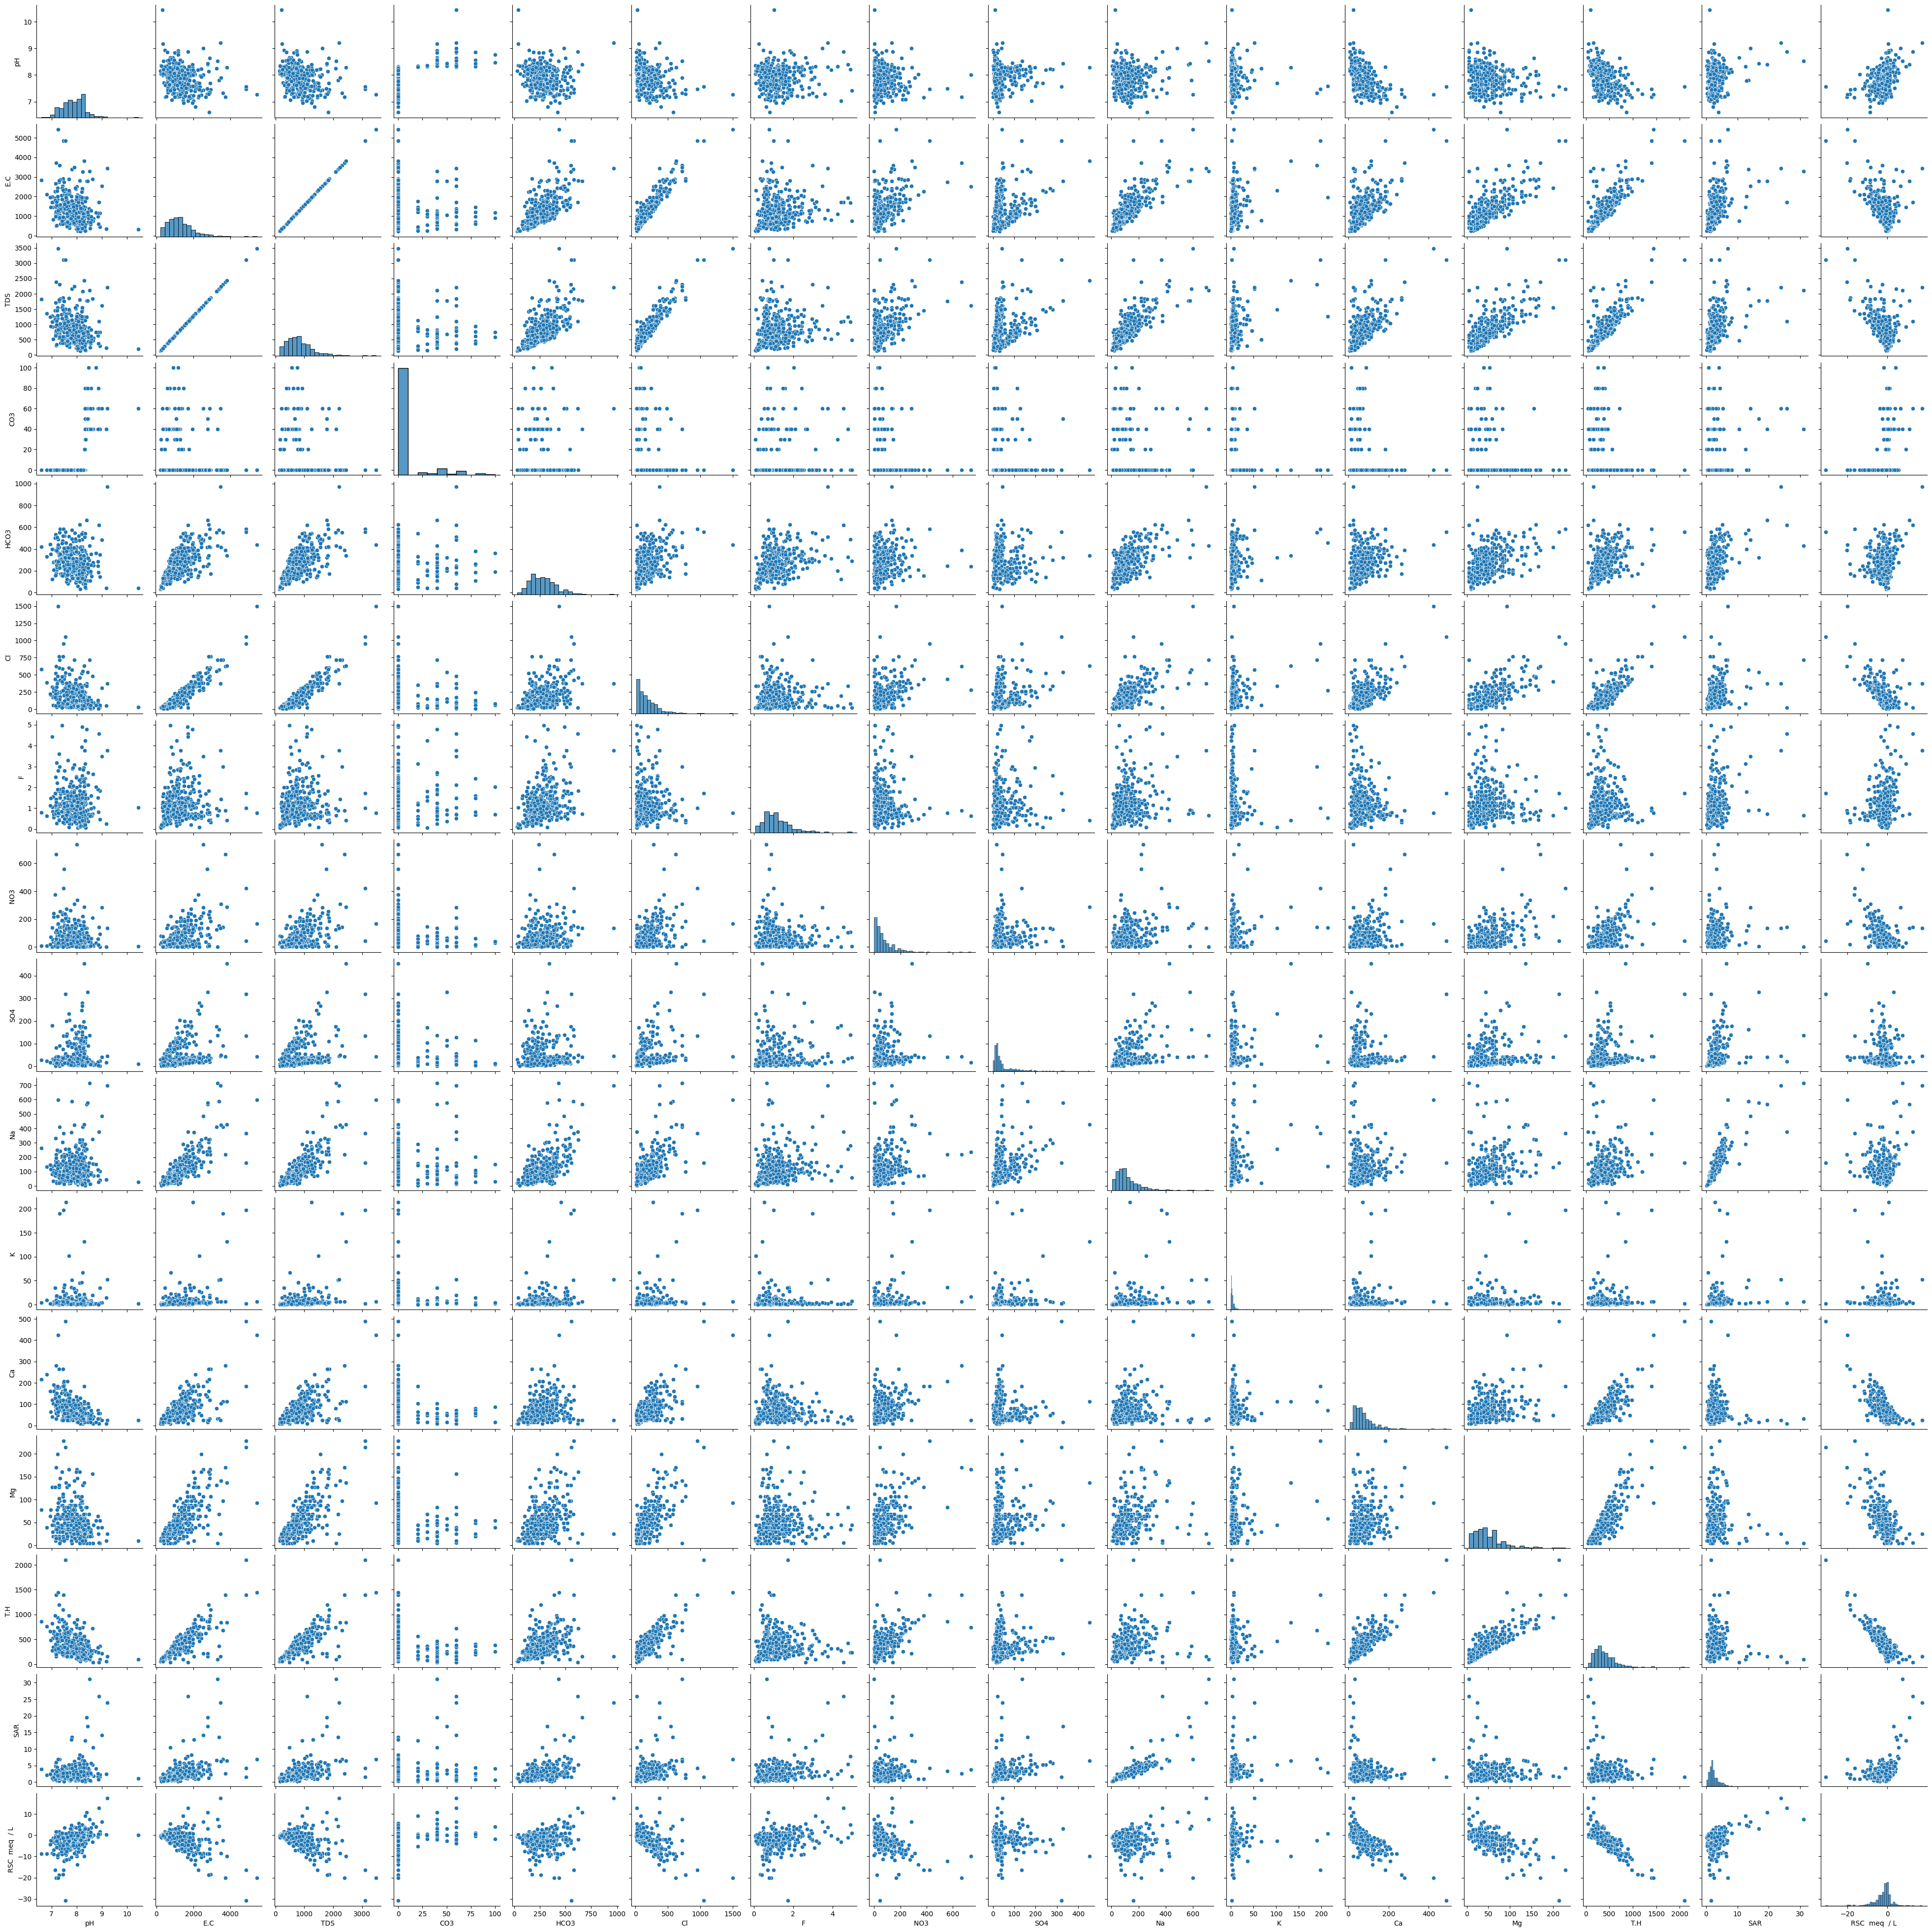

In [11]:
sns.pairplot(new_dataset_df)

/var/folders/9_/jmnm5w_n6fgbzchlwd2nvnzc0000gn/T/ipykernel_31420/202565560.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


<Figure size 640x480 with 0 Axes>

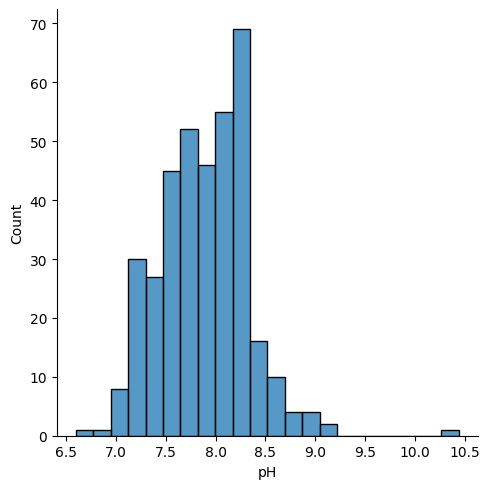

<Figure size 640x480 with 0 Axes>

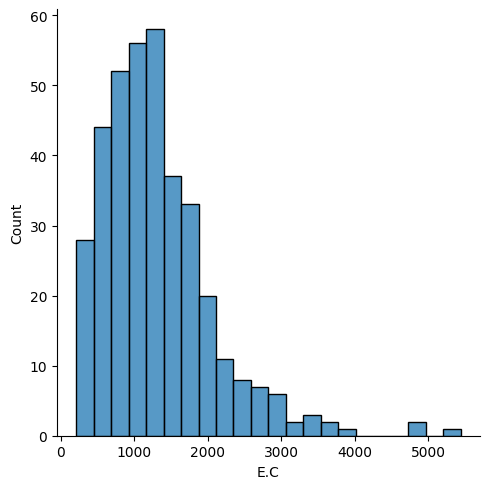

<Figure size 640x480 with 0 Axes>

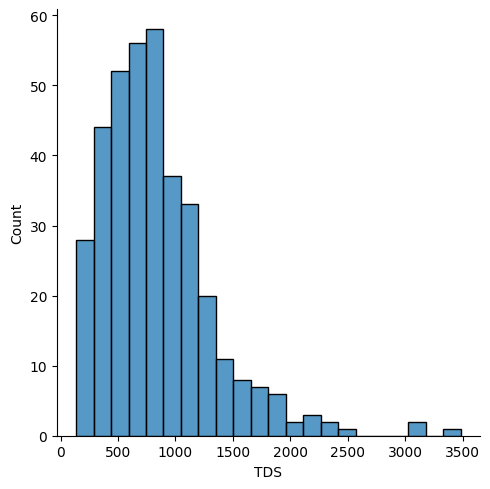

<Figure size 640x480 with 0 Axes>

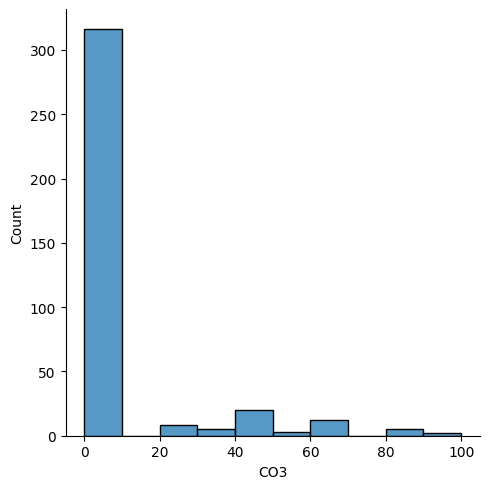

<Figure size 640x480 with 0 Axes>

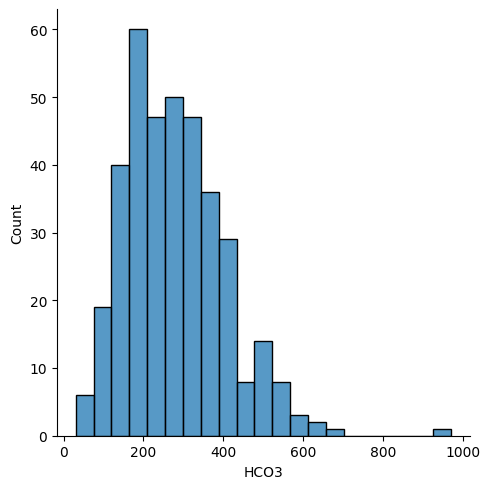

<Figure size 640x480 with 0 Axes>

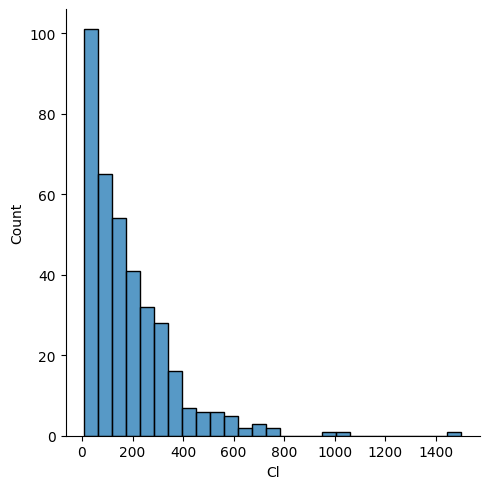

<Figure size 640x480 with 0 Axes>

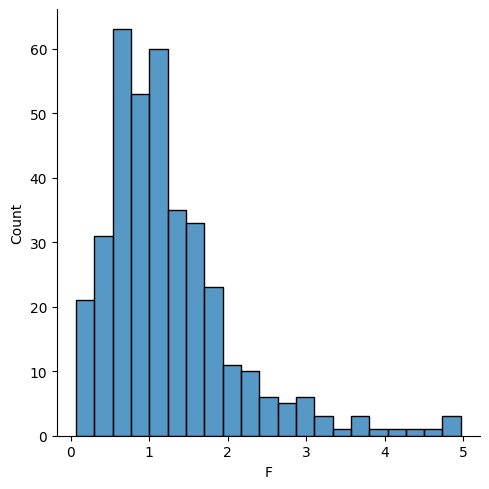

<Figure size 640x480 with 0 Axes>

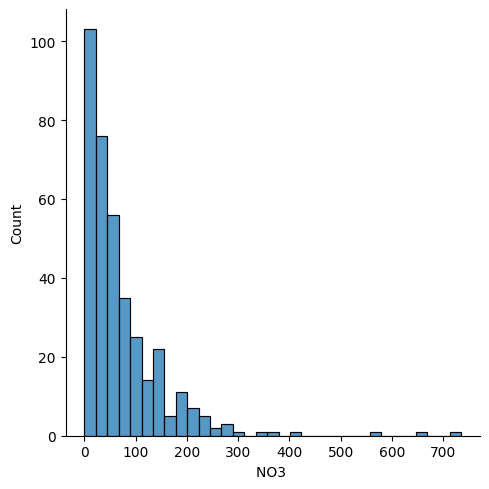

<Figure size 640x480 with 0 Axes>

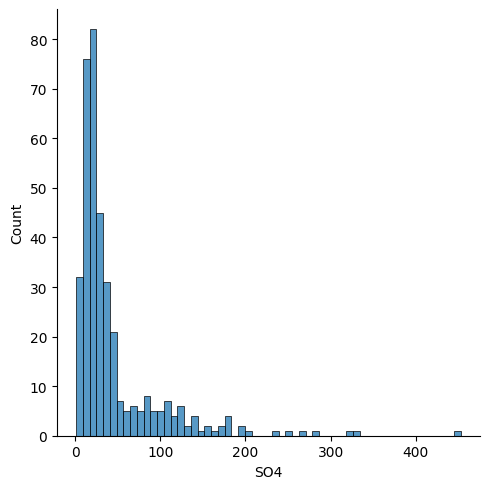

<Figure size 640x480 with 0 Axes>

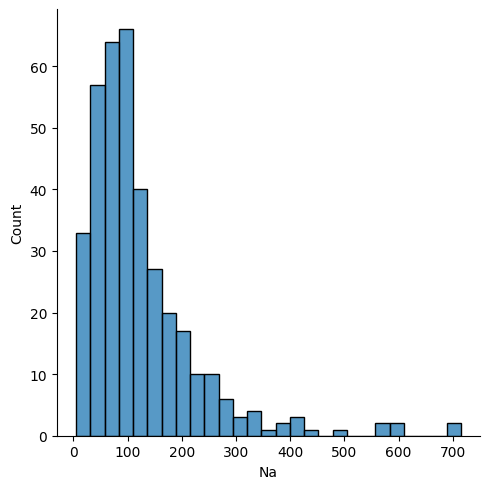

<Figure size 640x480 with 0 Axes>

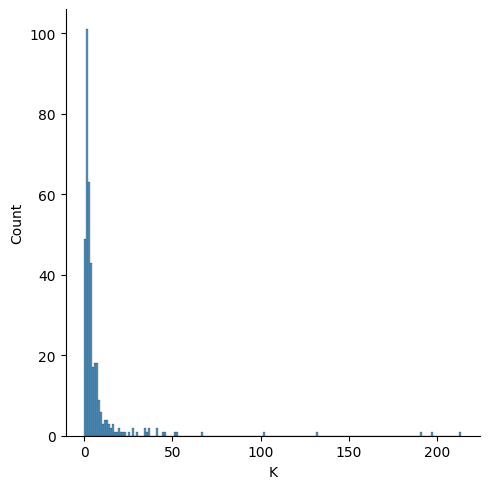

<Figure size 640x480 with 0 Axes>

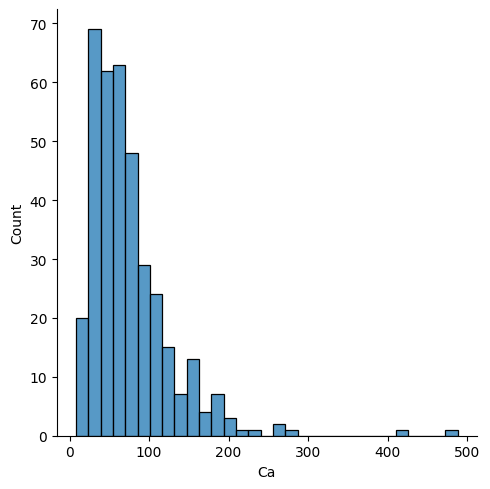

<Figure size 640x480 with 0 Axes>

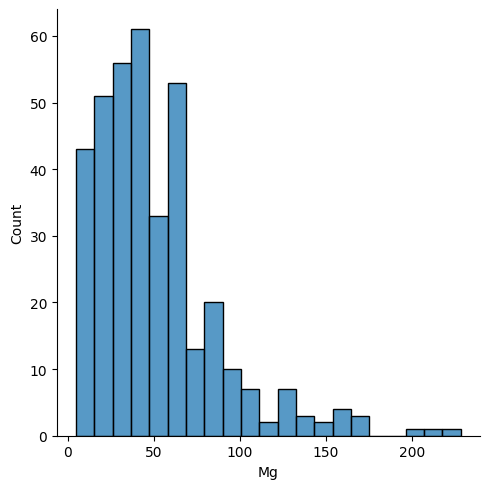

<Figure size 640x480 with 0 Axes>

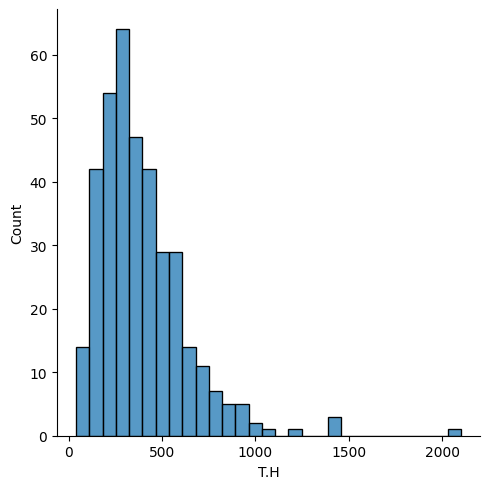

<Figure size 640x480 with 0 Axes>

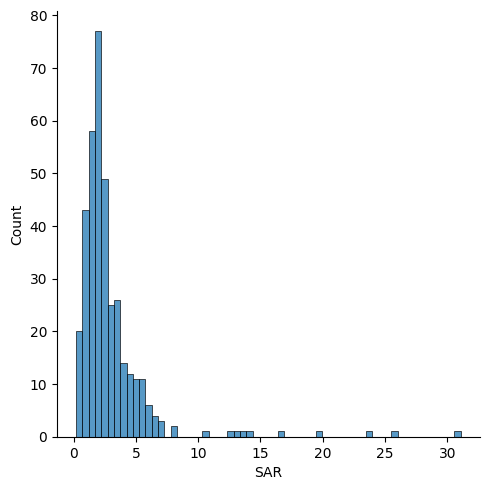

<Figure size 640x480 with 0 Axes>

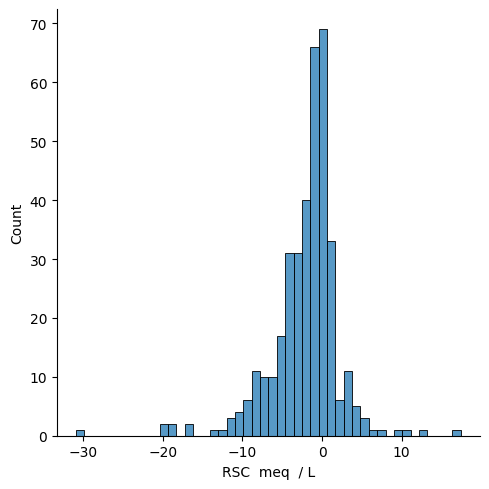

In [12]:
for column in new_dataset_df.columns:
    plt.figure()
    sns.displot(new_dataset_df[column])

In [13]:
dataset_ewqi = dataset_df.drop(['lat_gis','long_gis','gwl','sno','district','mandal','village','season','Classification','Classification.1'], axis=1)
max_values = dataset_ewqi.max()
min_values = dataset_ewqi.min()
normalized_dataset = (dataset_ewqi - min_values) / (max_values - min_values)
normalized_dataset.head()

,pH,E.C,TDS,CO3,HCO3,Cl,F,NO3,SO4,Na,K,Ca,Mg,T.H,SAR,RSC meq / L
0,0.437500,0.101951,0.101951,0.0,0.202001,0.033557,0.075510,0.056935,0.099558,0.061889,0.017983,0.083333,0.152174,0.116497,0.034712,0.614539
1,0.440104,0.135616,0.135616,0.0,0.212633,0.046980,0.100000,0.136391,0.148230,0.052026,0.022666,0.100000,0.260870,0.174739,0.023048,0.568991
2,0.283854,0.057001,0.057001,0.0,0.180738,0.013423,0.120408,0.055839,0.095133,0.056253,0.008617,0.033333,0.152174,0.087366,0.036200,0.631108
3,0.388021,0.040168,0.040168,0.0,0.138211,0.000000,0.104082,0.013919,0.075221,0.030891,0.003934,0.050000,0.065217,0.058250,0.023533,0.639378
4,0.419271,0.403405,0.403405,0.0,0.287054,0.221477,0.508163,0.174749,0.617257,0.412729,0.022666,0.100000,0.391304,0.232978,0.177510,0.548300


In [14]:
weights = {
    'pH': 0.2,
    'E.C': 0.15,
    'TDS': 0.15,
    'CO3': 0.05,
    'HCO3': 0.05,
    'Cl': 0.15,
    'F': 0.1,
    'NO3': 0.1,
    'SO4': 0.1,
    'Na': 0.05,
    'K': 0.05,
    'Ca': 0.05,
    'Mg': 0.05,
    'T.H': 0.05,
    'SAR': 0.05,
    'RSC meq / L': 0.05
}
weighted_quality = normalized_dataset * pd.Series(weights)
dataset_ewqi['EWQI'] = (weighted_quality.sum(axis=1)) * 100

In [15]:
#d ataset_ewqi.head()
dataset_df['EWQI'] = dataset_ewqi['EWQI']
dataset_df.head()

,sno,district,mandal,village,lat_gis,long_gis,gwl,season,pH,E.C,...,Na,K,Ca,Mg,T.H,SAR,Classification,RSC meq / L,Classification.1,EWQI
0,1,ADILABAD,Adilabad,Adilabad,19.668300,78.524700,5.09,postmonsoon 2018,8.28,745,...,49.0,4.0,48,38.896,279.934211,1.273328,C2S1,-1.198684,P.S.,17.405507
1,2,ADILABAD,Bazarhatnur,Bazarhatnur,19.458888,78.350833,5.10,postmonsoon 2018,8.29,921,...,42.0,5.0,56,63.206,399.893092,0.913166,C3S1,-3.397862,P.S.,20.287464
2,3,ADILABAD,Gudihatnoor,Gudihatnoor,19.525555,78.512222,4.98,postmonsoon 2018,7.69,510,...,45.0,2.0,24,38.896,219.934211,1.319284,C2S1,-0.398684,P.S.,12.517260
3,4,ADILABAD,Jainath,Jainath,19.730555,78.640000,5.75,postmonsoon 2018,8.09,422,...,27.0,1.0,32,19.448,159.967105,0.928155,C2S1,0.000658,P.S.,12.608680
4,5,ADILABAD,Narnoor,Narnoor,19.495665,78.852654,2.15,postmonsoon 2018,8.21,2321,...,298.0,5.0,56,92.378,519.843750,5.682664,C4S2,-4.396875,P.S.,43.185113


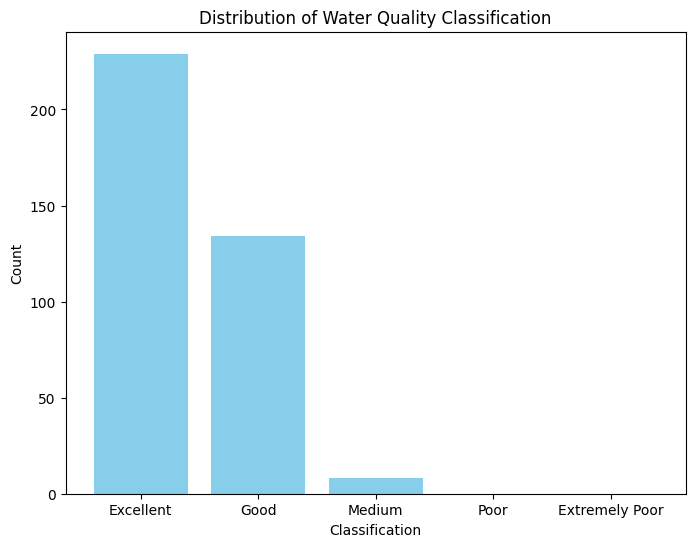

In [16]:
categories = [(0,25),(25, 50),(50, 100), (100, 150), (150, float('inf'))]
category_labels = ['Excellent','Good', 'Medium', 'Poor', 'Extremely Poor']

category_counts = []

for category in categories:
    count = dataset_ewqi[(dataset_ewqi['EWQI'] >= category[0]) & (dataset_ewqi['EWQI'] < category[1])]['EWQI'].count()
    category_counts.append(count)

plt.figure(figsize=(8, 6))
plt.bar(category_labels, category_counts, color='skyblue')
plt.title('Distribution of Water Quality Classification')
plt.xlabel('Classification')
plt.ylabel('Count')
plt.show()

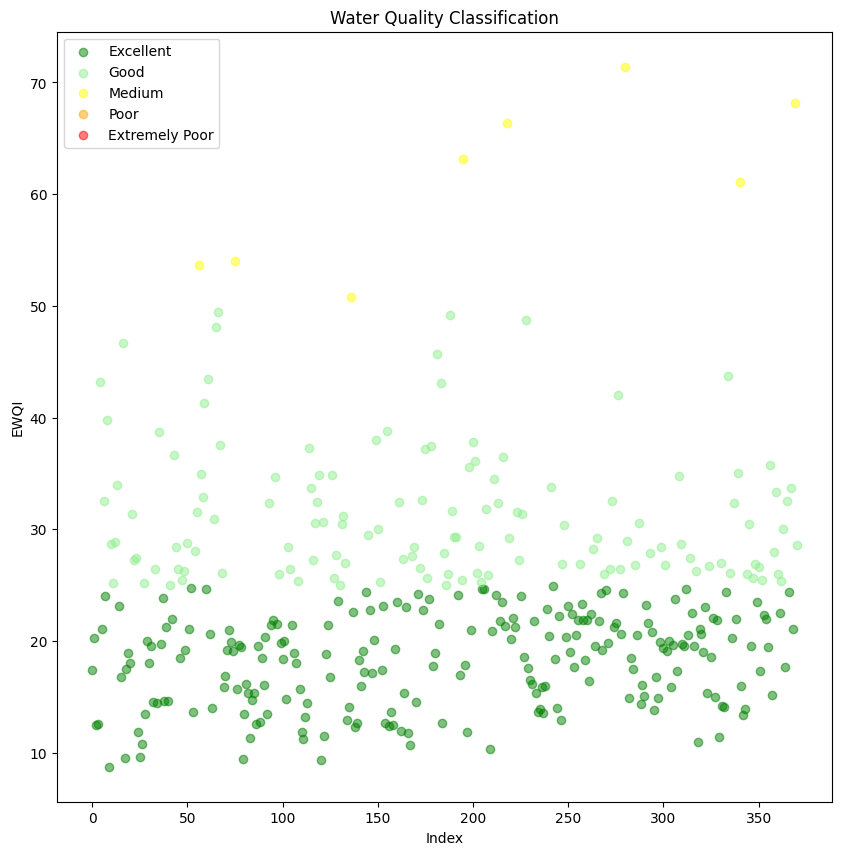

In [17]:
colors = np.array([
    'green',       
    'lightgreen',   
    'yellow',       
    'orange',       
    'red'           
])

plt.figure(figsize=(10,10))
for i, category in enumerate(categories):
    data = dataset_ewqi[(dataset_ewqi['EWQI'] >= category[0]) & (dataset_ewqi['EWQI'] < category[1])]['EWQI']
    plt.scatter(data.index, data, label=category_labels[i], color=colors[i], alpha=0.5)

plt.title('Water Quality Classification')
plt.xlabel('Index')
plt.ylabel('EWQI')
plt.legend()
plt.show()

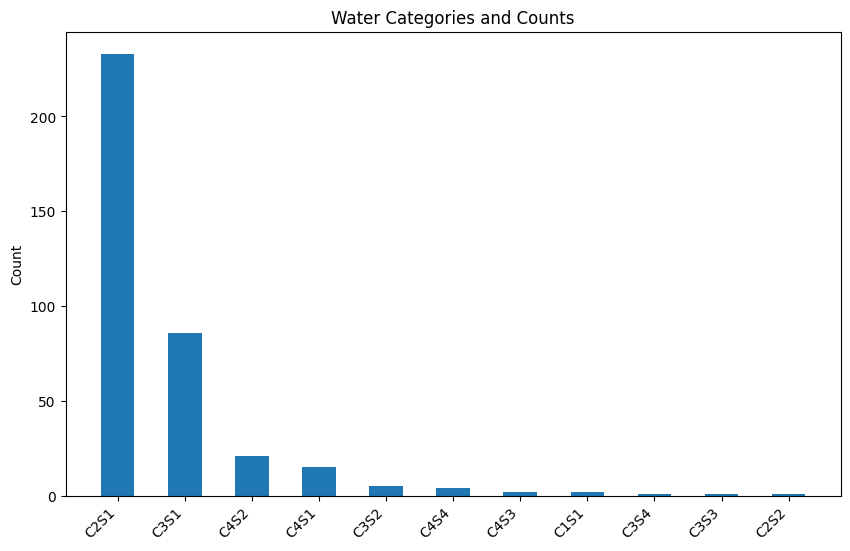

In [18]:
crop_categories = dataset_df['Classification'].unique()
category_count_crop = dataset_df['Classification'].value_counts()
fig, ax = plt.subplots(figsize=(10, 8))
bar_width = 0.5
bar_positions = range(len(crop_categories))
bars = ax.bar(bar_positions, category_count_crop, bar_width, align='center')
ax.set_xticks(bar_positions)
ax.set_xticklabels(crop_categories, rotation=45, ha='right')
ax.set_ylabel('Count')
ax.set_title('Water Categories and Counts')
plt.subplots_adjust(bottom=0.3)
plt.show()

In [19]:
crop_chemical_concentration = dataset_df.drop(['lat_gis','EWQI','long_gis','gwl','sno','district','mandal','village','season','Classification.1'], axis=1)

mean_concentration = crop_chemical_concentration.groupby('Classification').mean()
mean_concentration.reset_index(inplace=True)
mean_concentration.head()

,Classification,pH,E.C,TDS,CO3,HCO3,Cl,F,NO3,SO4,Na,K,Ca,Mg,T.H,SAR,RSC meq / L
0,C1S1,8.255000,226.000000,144.640000,15.000000,35.000000,20.000000,0.090000,50.951719,20.500000,20.500000,1.000000,12.000000,12.155000,69.979441,1.079385,-0.399589
1,C2S1,8.060814,548.372093,350.958140,8.488372,164.152633,45.930233,0.887407,27.123175,24.953488,45.770805,3.266744,37.116279,22.727023,186.008071,1.507039,-0.267341
2,C2S2,8.650000,745.000000,476.800000,40.000000,274.562306,20.000000,2.640000,14.172800,14.000000,152.490812,3.700000,8.000000,4.862000,39.991776,10.484084,5.491411
3,C3S1,7.844292,1315.725322,842.064206,5.793991,289.038235,181.545064,1.351090,73.245794,43.572961,113.970550,6.640730,78.695279,52.481571,412.359844,2.563423,-2.350509
4,C3S2,8.125000,1684.250000,1077.920000,10.000000,431.773428,190.000000,1.442500,40.233439,64.625000,245.112619,9.825000,44.000000,46.189000,299.921875,6.229600,2.837031


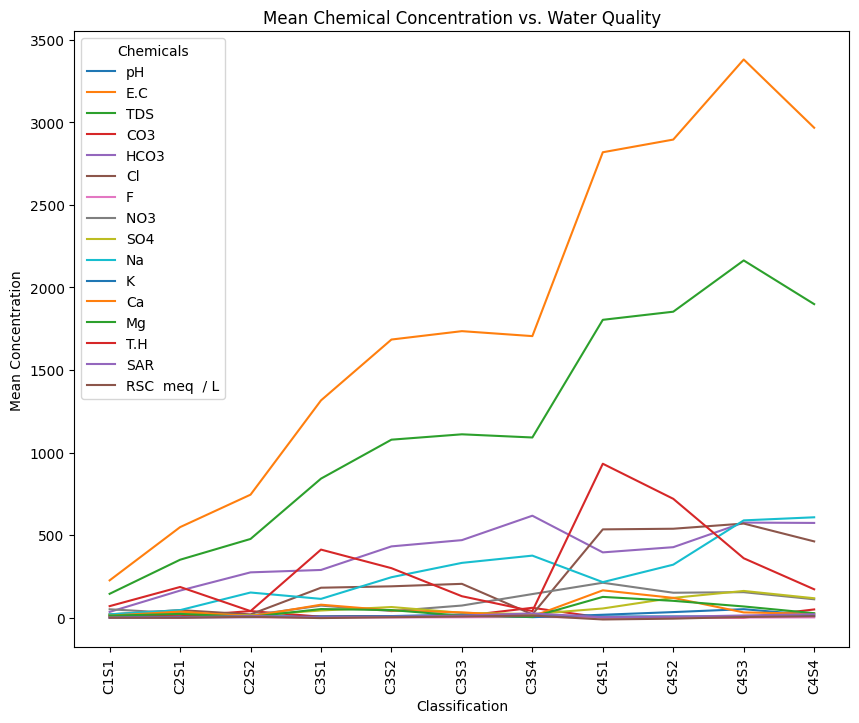

In [21]:
fig, ax = plt.subplots(figsize=(10, 8))
colors = plt.cm.tab20(np.linspace(0, 1, 16))
for col in mean_concentration.columns[1:]: 
    ax.plot(mean_concentration['Classification'], mean_concentration[col], label=col)
ax.set_xlabel('Classification')
ax.set_ylabel('Mean Concentration')
ax.set_title('Mean Chemical Concentration vs. Water Quality')
ax.legend(title='Chemicals')
plt.xticks(rotation=90)
plt.show()